In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('reduced.csv')
df = df.drop(['DIABETES','PREVAP','PREVCHD','PREVMI','PREVSTRK','PREVHYP'], axis=1)
df.head()

,SEX,AGE,SYSBP,DIABP,BPMEDS,CIGPDAY,EDUC,TOTCHOL,BMI,GLUCOSE,HEARTRTE,ANGINA,HOSPMI,MI_FCHD,ANYCHD,STROKE,CVD,HYPERTEN
0,1,39,106.0,70.0,0.0,0.0,4.0,195.0,26.97,77.0,80.0,0,1,1,1,0,1,0
1,2,46,121.0,81.0,0.0,0.0,2.0,250.0,28.73,76.0,95.0,0,0,0,0,0,0,0
2,2,52,105.0,69.5,0.0,0.0,2.0,260.0,29.43,86.0,80.0,0,0,0,0,0,0,0
3,2,58,108.0,66.0,0.0,0.0,2.0,237.0,28.50,71.0,80.0,0,0,0,0,0,0,0
4,1,48,127.5,80.0,0.0,20.0,1.0,245.0,25.34,70.0,75.0,0,0,0,0,0,0,0


In [4]:
predictor = "STROKE"

In [5]:
target = df[[predictor]]

In [6]:
data = df.drop([predictor], axis=1)
feature_names = data.columns
data.head()

,SEX,AGE,SYSBP,DIABP,BPMEDS,CIGPDAY,EDUC,TOTCHOL,BMI,GLUCOSE,HEARTRTE,ANGINA,HOSPMI,MI_FCHD,ANYCHD,CVD,HYPERTEN
0,1,39,106.0,70.0,0.0,0.0,4.0,195.0,26.97,77.0,80.0,0,1,1,1,1,0
1,2,46,121.0,81.0,0.0,0.0,2.0,250.0,28.73,76.0,95.0,0,0,0,0,0,0
2,2,52,105.0,69.5,0.0,0.0,2.0,260.0,29.43,86.0,80.0,0,0,0,0,0,0
3,2,58,108.0,66.0,0.0,0.0,2.0,237.0,28.50,71.0,80.0,0,0,0,0,0,0
4,1,48,127.5,80.0,0.0,20.0,1.0,245.0,25.34,70.0,75.0,0,0,0,0,0,0


In [7]:
print(data.shape, target.shape)

(9310, 17) (9310, 1)


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [9]:
from keras.utils import to_categorical

Using TensorFlow backend.


In [10]:
# One-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)
y_train_categorical

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

network architecture

In [11]:
from keras.models import Sequential
from keras.layers import Dense

In [12]:
# clear session a couple times and restart kernel if accuracy gets stuck
from keras import backend
backend.clear_session()
backend.clear_session()
backend.clear_session()
backend.clear_session()
backend.clear_session()

In [13]:
# Create model and add layers
# network architecture: [17, 15, 12, 10, 6, 4, 2]
model = Sequential()
model.add(Dense(units=15, activation='relu', input_dim=17))
model.add(Dense(units=12, activation='relu'))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=6, activation='relu'))
model.add(Dense(units=4, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

In [14]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
# accuracy before training
# make sure this accuracy is low
model_loss, model_accuracy = model.evaluate(
    X_test, y_test_categorical, verbose=2)
print(f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Normal Neural Network - Loss: 8.984691459288712, Accuracy: 0.09621993128427934


In [16]:
history = model.fit(
    X_train,
    y_train_categorical,
    epochs=1000,
    shuffle=True,
    verbose=2
)

Epoch 1/1000
 - 1s - loss: 0.7345 - acc: 0.8245
Epoch 2/1000
 - 0s - loss: 0.2985 - acc: 0.9098
Epoch 3/1000
 - 0s - loss: 0.2914 - acc: 0.9098
Epoch 4/1000
 - 0s - loss: 0.2882 - acc: 0.9098
Epoch 5/1000
 - 0s - loss: 0.2828 - acc: 0.9098
Epoch 6/1000
 - 0s - loss: 0.2792 - acc: 0.9095
Epoch 7/1000
 - 1s - loss: 0.2709 - acc: 0.9098
Epoch 8/1000
 - 0s - loss: 0.2665 - acc: 0.9098
Epoch 9/1000
 - 0s - loss: 0.2597 - acc: 0.9098
Epoch 10/1000
 - 0s - loss: 0.2526 - acc: 0.9098
Epoch 11/1000
 - 0s - loss: 0.2404 - acc: 0.9096
Epoch 12/1000
 - 0s - loss: 0.2245 - acc: 0.9098
Epoch 13/1000
 - 0s - loss: 0.2050 - acc: 0.9098
Epoch 14/1000
 - 0s - loss: 0.1989 - acc: 0.9098
Epoch 15/1000
 - 0s - loss: 0.1799 - acc: 0.9098
Epoch 16/1000
 - 0s - loss: 0.1818 - acc: 0.9098
Epoch 17/1000
 - 0s - loss: 0.1686 - acc: 0.9098
Epoch 18/1000
 - 0s - loss: 0.1708 - acc: 0.9098
Epoch 19/1000
 - 0s - loss: 0.1765 - acc: 0.9099
Epoch 20/1000
 - 0s - loss: 0.1607 - acc: 0.9098
Epoch 21/1000
 - 0s - loss: 0

 - 0s - loss: 0.1001 - acc: 0.9608
Epoch 168/1000
 - 0s - loss: 0.1023 - acc: 0.9592
Epoch 169/1000
 - 0s - loss: 0.1025 - acc: 0.9583
Epoch 170/1000
 - 0s - loss: 0.1024 - acc: 0.9598
Epoch 171/1000
 - 0s - loss: 0.0961 - acc: 0.9625
Epoch 172/1000
 - 0s - loss: 0.0967 - acc: 0.9612
Epoch 173/1000
 - 0s - loss: 0.1003 - acc: 0.9618
Epoch 174/1000
 - 0s - loss: 0.1080 - acc: 0.9565
Epoch 175/1000
 - 0s - loss: 0.1006 - acc: 0.9610
Epoch 176/1000
 - 0s - loss: 0.1006 - acc: 0.9608
Epoch 177/1000
 - 0s - loss: 0.1007 - acc: 0.9589
Epoch 178/1000
 - 0s - loss: 0.1098 - acc: 0.9592
Epoch 179/1000
 - 0s - loss: 0.1062 - acc: 0.9562
Epoch 180/1000
 - 0s - loss: 0.1026 - acc: 0.9618
Epoch 181/1000
 - 0s - loss: 0.1007 - acc: 0.9610
Epoch 182/1000
 - 0s - loss: 0.0974 - acc: 0.9603
Epoch 183/1000
 - 0s - loss: 0.1014 - acc: 0.9608
Epoch 184/1000
 - 0s - loss: 0.1027 - acc: 0.9600
Epoch 185/1000
 - 0s - loss: 0.0956 - acc: 0.9616
Epoch 186/1000
 - 0s - loss: 0.1019 - acc: 0.9589
Epoch 187/1000


 - 0s - loss: 0.0939 - acc: 0.9628
Epoch 332/1000
 - 0s - loss: 0.0943 - acc: 0.9610
Epoch 333/1000
 - 0s - loss: 0.0913 - acc: 0.9632
Epoch 334/1000
 - 0s - loss: 0.0952 - acc: 0.9610
Epoch 335/1000
 - 0s - loss: 0.0927 - acc: 0.9618
Epoch 336/1000
 - 0s - loss: 0.0977 - acc: 0.9622
Epoch 337/1000
 - 0s - loss: 0.1006 - acc: 0.9596
Epoch 338/1000
 - 0s - loss: 0.0961 - acc: 0.9638
Epoch 339/1000
 - 0s - loss: 0.0907 - acc: 0.9638
Epoch 340/1000
 - 0s - loss: 0.0949 - acc: 0.9620
Epoch 341/1000
 - 0s - loss: 0.0927 - acc: 0.9628
Epoch 342/1000
 - 0s - loss: 0.0983 - acc: 0.9615
Epoch 343/1000
 - 0s - loss: 0.0969 - acc: 0.9615
Epoch 344/1000
 - 0s - loss: 0.0946 - acc: 0.9623
Epoch 345/1000
 - 0s - loss: 0.0948 - acc: 0.9613
Epoch 346/1000
 - 0s - loss: 0.0973 - acc: 0.9620
Epoch 347/1000
 - 0s - loss: 0.0927 - acc: 0.9623
Epoch 348/1000
 - 0s - loss: 0.0889 - acc: 0.9658
Epoch 349/1000
 - 0s - loss: 0.1018 - acc: 0.9592
Epoch 350/1000
 - 0s - loss: 0.0946 - acc: 0.9619
Epoch 351/1000


 - 0s - loss: 0.0972 - acc: 0.9608
Epoch 496/1000
 - 0s - loss: 0.0887 - acc: 0.9636
Epoch 497/1000
 - 0s - loss: 0.0868 - acc: 0.9635
Epoch 498/1000
 - 0s - loss: 0.0881 - acc: 0.9636
Epoch 499/1000
 - 0s - loss: 0.0866 - acc: 0.9645
Epoch 500/1000
 - 0s - loss: 0.0887 - acc: 0.9636
Epoch 501/1000
 - 0s - loss: 0.0897 - acc: 0.9628
Epoch 502/1000
 - 0s - loss: 0.0884 - acc: 0.9626
Epoch 503/1000
 - 0s - loss: 0.0869 - acc: 0.9638
Epoch 504/1000
 - 0s - loss: 0.0986 - acc: 0.9615
Epoch 505/1000
 - 0s - loss: 0.0874 - acc: 0.9641
Epoch 506/1000
 - 0s - loss: 0.0864 - acc: 0.9643
Epoch 507/1000
 - 0s - loss: 0.0862 - acc: 0.9635
Epoch 508/1000
 - 0s - loss: 0.0939 - acc: 0.9613
Epoch 509/1000
 - 0s - loss: 0.0842 - acc: 0.9643
Epoch 510/1000
 - 0s - loss: 0.0890 - acc: 0.9636
Epoch 511/1000
 - 0s - loss: 0.0892 - acc: 0.9633
Epoch 512/1000
 - 0s - loss: 0.0887 - acc: 0.9645
Epoch 513/1000
 - 0s - loss: 0.0867 - acc: 0.9639
Epoch 514/1000
 - 0s - loss: 0.0889 - acc: 0.9642
Epoch 515/1000


 - 0s - loss: 0.0854 - acc: 0.9642
Epoch 660/1000
 - 0s - loss: 0.0846 - acc: 0.9643
Epoch 661/1000
 - 0s - loss: 0.0836 - acc: 0.9642
Epoch 662/1000
 - 0s - loss: 0.0834 - acc: 0.9651
Epoch 663/1000
 - 0s - loss: 0.0838 - acc: 0.9642
Epoch 664/1000
 - 0s - loss: 0.0820 - acc: 0.9649
Epoch 665/1000
 - 0s - loss: 0.0835 - acc: 0.9656
Epoch 666/1000
 - 0s - loss: 0.0833 - acc: 0.9651
Epoch 667/1000
 - 0s - loss: 0.0851 - acc: 0.9653
Epoch 668/1000
 - 0s - loss: 0.0823 - acc: 0.9648
Epoch 669/1000
 - 0s - loss: 0.0870 - acc: 0.9632
Epoch 670/1000
 - 0s - loss: 0.0831 - acc: 0.9635
Epoch 671/1000
 - 0s - loss: 0.0814 - acc: 0.9652
Epoch 672/1000
 - 0s - loss: 0.0879 - acc: 0.9643
Epoch 673/1000
 - 0s - loss: 0.0858 - acc: 0.9632
Epoch 674/1000
 - 0s - loss: 0.0828 - acc: 0.9662
Epoch 675/1000
 - 0s - loss: 0.0821 - acc: 0.9653
Epoch 676/1000
 - 0s - loss: 0.0829 - acc: 0.9646
Epoch 677/1000
 - 0s - loss: 0.0855 - acc: 0.9642
Epoch 678/1000
 - 0s - loss: 0.0840 - acc: 0.9642
Epoch 679/1000


 - 0s - loss: 0.0903 - acc: 0.9628
Epoch 824/1000
 - 0s - loss: 0.0838 - acc: 0.9636
Epoch 825/1000
 - 0s - loss: 0.0866 - acc: 0.9626
Epoch 826/1000
 - 0s - loss: 0.0809 - acc: 0.9659
Epoch 827/1000
 - 0s - loss: 0.0797 - acc: 0.9661
Epoch 828/1000
 - 0s - loss: 0.0833 - acc: 0.9656
Epoch 829/1000
 - 0s - loss: 0.0809 - acc: 0.9653
Epoch 830/1000
 - 0s - loss: 0.0801 - acc: 0.9666
Epoch 831/1000
 - 0s - loss: 0.0808 - acc: 0.9663
Epoch 832/1000
 - 0s - loss: 0.0795 - acc: 0.9662
Epoch 833/1000
 - 1s - loss: 0.0838 - acc: 0.9643
Epoch 834/1000
 - 1s - loss: 0.0817 - acc: 0.9642
Epoch 835/1000
 - 1s - loss: 0.0796 - acc: 0.9649
Epoch 836/1000
 - 1s - loss: 0.0810 - acc: 0.9653
Epoch 837/1000
 - 0s - loss: 0.0796 - acc: 0.9668
Epoch 838/1000
 - 0s - loss: 0.0813 - acc: 0.9632
Epoch 839/1000
 - 0s - loss: 0.0802 - acc: 0.9661
Epoch 840/1000
 - 0s - loss: 0.0820 - acc: 0.9651
Epoch 841/1000
 - 0s - loss: 0.0806 - acc: 0.9643
Epoch 842/1000
 - 0s - loss: 0.0841 - acc: 0.9645
Epoch 843/1000


 - 0s - loss: 0.0772 - acc: 0.9661
Epoch 988/1000
 - 0s - loss: 0.0804 - acc: 0.9661
Epoch 989/1000
 - 0s - loss: 0.0792 - acc: 0.9651
Epoch 990/1000
 - 0s - loss: 0.0773 - acc: 0.9668
Epoch 991/1000
 - 0s - loss: 0.0778 - acc: 0.9663
Epoch 992/1000
 - 0s - loss: 0.0786 - acc: 0.9653
Epoch 993/1000
 - 0s - loss: 0.0796 - acc: 0.9671
Epoch 994/1000
 - 0s - loss: 0.0805 - acc: 0.9655
Epoch 995/1000
 - 0s - loss: 0.0802 - acc: 0.9648
Epoch 996/1000
 - 0s - loss: 0.0844 - acc: 0.9652
Epoch 997/1000
 - 0s - loss: 0.0787 - acc: 0.9661
Epoch 998/1000
 - 0s - loss: 0.0789 - acc: 0.9656
Epoch 999/1000
 - 0s - loss: 0.0791 - acc: 0.9671
Epoch 1000/1000
 - 0s - loss: 0.0774 - acc: 0.9661


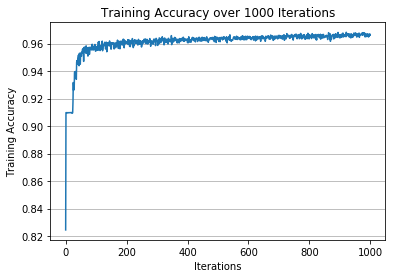

In [17]:
# accuracy should increase over epochs
plt.plot(history.history['acc'])
plt.title('Training Accuracy over 1000 Iterations')
plt.ylabel('Training Accuracy')
plt.xlabel('Iterations')
plt.grid(axis='y')

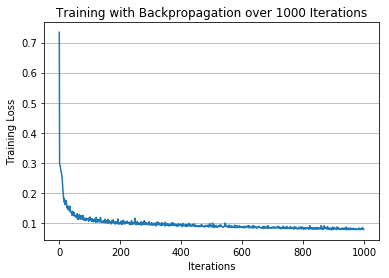

In [18]:
# loss is sum of error on training set
# error should decrease over epochs, steeper the better
plt.plot(history.history['loss'])
plt.title('Training with Backpropagation over 1000 Iterations')
plt.ylabel('Training Loss')
plt.xlabel('Iterations')
plt.grid(axis='y')

In [19]:
# accuracy after training
model_loss, model_accuracy = model.evaluate(
    X_test, y_test_categorical, verbose=2)
print(f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Normal Neural Network - Loss: 0.10166160974177912, Accuracy: 0.9617697592453449


In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
label_encoder = LabelEncoder()
label_encoder.fit(df[predictor])

LabelEncoder()

In [22]:
encoded_predictions = model.predict_classes(X_test)
prediction_labels = label_encoder.inverse_transform(encoded_predictions)

c:\Users\nssas\Anaconda3\envs\PythonData\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [23]:
test_df = pd.DataFrame({'predicted':prediction_labels,'actual':np.ravel(y_test)})
test_df.head()

,predicted,actual
0,0,0
1,0,0
2,1,1
3,0,0
4,0,0


In [24]:
corr = 0
wron = 0

for index, row in test_df.iterrows():
    if row['predicted'] == row['actual']:
        corr = corr + 1
    else:
        wron = wron + 1
        
print(f'Correct predictions: {corr}')
print(f'Incorrect predictions: {wron}')

Correct predictions: 2239
Incorrect predictions: 89
